---
### Clustering Saham Bank di Indonesia menggunakan metode KMeans
---

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

In [2]:
companies_list = {
    'Bank BRI' : 'BBRI.JK',
    'Bank BNI' : 'BBNI.JK',
    'Bank BCA' : 'BBCA.JK',
    'Bank Mandiri' : 'BMRI.JK',
    'Bank Maybank' : 'BNII.JK',
    'Bank Capital Indonesia': 'BACA.JK',
    'Bank Pan Indonesia' : 'PNBN.JK', 
    'Allo Bank Indonesia' : 'BBHI.JK',
}

companies = sorted(companies_list.items(),key = lambda x:x[1] )
companies

[('Bank Capital Indonesia', 'BACA.JK'),
 ('Bank BCA', 'BBCA.JK'),
 ('Allo Bank Indonesia', 'BBHI.JK'),
 ('Bank BNI', 'BBNI.JK'),
 ('Bank BRI', 'BBRI.JK'),
 ('Bank Mandiri', 'BMRI.JK'),
 ('Bank Maybank', 'BNII.JK'),
 ('Bank Pan Indonesia', 'PNBN.JK')]

In [3]:
data_source = 'yahoo'

start = '2019-11-01'

end = '2021-11-01'

panel_data = web.DataReader(list(companies_list.values()), data_source,start,end)

print(panel_data)

Attributes    Adj Close                                                     \
Symbols         BBRI.JK      BBNI.JK      BBCA.JK      BMRI.JK     BNII.JK   
Date                                                                         
2019-11-01  3950.900635  7392.887695  6073.383301  6420.579590  206.033539   
2019-11-04  3931.996826  7344.725586  6025.372070  6328.528320  206.033539   
2019-11-05  4064.323486  7441.049805  6106.991211  6627.694824  204.108002   
2019-11-06  3931.996826  7224.320312  6044.576660  6420.579590  207.959091   
2019-11-07  3780.766113  7320.644531  6034.975098  6443.592285  206.033539   
...                 ...          ...          ...          ...         ...   
2021-10-26  4350.000000  7275.000000  7499.833008  7175.000000  338.000000   
2021-10-27  4290.000000  7075.000000  7425.083496  7150.000000  336.000000   
2021-10-28  4240.000000  7050.000000  7350.334473  7025.000000  334.000000   
2021-10-29  4250.000000  7000.000000  7450.000000  7175.000000  

In [5]:
panel_data.head()

Attributes    Adj Close                                                     \
Symbols         BBRI.JK      BBNI.JK      BBCA.JK      BMRI.JK     BNII.JK   
Date                                                                         
2019-11-01  3950.900635  7392.887695  6073.383301  6420.579590  206.033539   
2019-11-04  3931.996826  7344.725586  6025.372070  6328.528320  206.033539   
2019-11-05  4064.323486  7441.049805  6106.991211  6627.694824  204.108002   
2019-11-06  3931.996826  7224.320312  6044.576660  6420.579590  207.959091   
2019-11-07  3780.766113  7320.644531  6034.975098  6443.592285  206.033539   

Attributes                           Close          ...    Open          \
Symbols    BACA.JK PNBN.JK BBHI.JK BBRI.JK BBNI.JK  ... PNBN.JK BBHI.JK   
Date                                                ...                   
2019-11-01   290.0  1330.0   180.0  4180.0  7675.0  ...  1340.0   180.0   
2019-11-04   270.0  1325.0   185.0  4160.0  7625.0  ...  1330.0   180.0   
2019-11-05   268.0  1315.0   180.0  4300.0  7725.0  ...  1320.0   185.0   
2019-11-06   268.0  1325.0   176.0  4160.0  7500.0  ...  1320.0   180.0   
2019-11-07   268.0  1315.0   177.0  4000.0  7600.0  ...  1330.0   176.0   

Attributes       Volume                                                \
Symbols         BBRI.JK     BBNI.JK     BBCA.JK     BMRI.JK   BNII.JK   
Date                                                                    
2019-11-01   63281400.0   9648100.0  42080500.0  12183400.0  866400.0   
2019-11-04   50272200.0  16764200.0  43794500.0  28292400.0  460300.0   
2019-11-05  132545000.0  50649200.0  66161500.0  47126500.0  879900.0   
2019-11-06  132500400.0  36779800.0  63393000.0  56587600.0  501700.0   
2019-11-07  292323600.0  23978200.0  61972000.0  39376800.0  208300.0   

Attributes                                 
Symbols      BACA.JK    PNBN.JK   BBHI.JK  
Date                                       
2019-11-01  270100.0  1235200.0   84800.0  
2019-11-04   35100.0  1310700.0   19300.0  
2019-11-05  186600.0  1796000.0  202500.0  
2019-11-06  117000.0  2094700.0  221600.0  
2019-11-07  111100.0  1912700.0   61400.0  

[5 rows x 48 columns]

In [6]:
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 486 entries, 2019-11-01 to 2021-11-01
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BBRI.JK)  486 non-null    float64
 1   (Adj Close, BBNI.JK)  486 non-null    float64
 2   (Adj Close, BBCA.JK)  486 non-null    float64
 3   (Adj Close, BMRI.JK)  486 non-null    float64
 4   (Adj Close, BNII.JK)  486 non-null    float64
 5   (Adj Close, BACA.JK)  486 non-null    float64
 6   (Adj Close, PNBN.JK)  486 non-null    float64
 7   (Adj Close, BBHI.JK)  486 non-null    float64
 8   (Close, BBRI.JK)      486 non-null    float64
 9   (Close, BBNI.JK)      486 non-null    float64
 10  (Close, BBCA.JK)      486 non-null    float64
 11  (Close, BMRI.JK)      486 non-null    float64
 12  (Close, BNII.JK)      486 non-null    float64
 13  (Close, BACA.JK)      486 non-null    float64
 14  (Close, PNBN.JK)      486 non-null    float64
 15  (Clo

In [7]:
panel_data.isnull().sum()

Attributes  Symbols
Adj Close   BBRI.JK    0
            BBNI.JK    0
            BBCA.JK    0
            BMRI.JK    0
            BNII.JK    0
            BACA.JK    0
            PNBN.JK    0
            BBHI.JK    0
Close       BBRI.JK    0
            BBNI.JK    0
            BBCA.JK    0
            BMRI.JK    0
            BNII.JK    0
            BACA.JK    0
            PNBN.JK    0
            BBHI.JK    0
High        BBRI.JK    0
            BBNI.JK    0
            BBCA.JK    0
            BMRI.JK    0
            BNII.JK    0
            BACA.JK    0
            PNBN.JK    0
            BBHI.JK    0
Low         BBRI.JK    0
            BBNI.JK    0
            BBCA.JK    0
            BMRI.JK    0
            BNII.JK    0
            BACA.JK    0
            PNBN.JK    0
            BBHI.JK    0
Open        BBRI.JK    0
            BBNI.JK    0
            BBCA.JK    0
            BMRI.JK    0
            BNII.JK    0
            BACA.JK    0
            PNBN.JK    0
     

In [8]:
panel_data.describe()

Attributes    Adj Close                                                     \
Symbols         BBRI.JK      BBNI.JK      BBCA.JK      BMRI.JK     BNII.JK   
count        486.000000   486.000000   486.000000   486.000000  486.000000   
mean        3768.555373  5584.624488  6169.297157  5956.938775  265.335964   
std          596.259708  1099.999922   570.739647   839.439406   92.003590   
min         2123.545166  3135.911377  4267.230469  3597.241699  109.756187   
25%         3212.228943  4703.867188  5973.508667  5566.296631  194.480255   
50%         3923.349854  5450.000000  6249.030273  6100.000000  230.023193   
75%         4227.518555  6351.212891  6533.077148  6475.000000  345.758698   
max         4785.315918  7657.779297  7724.080078  7364.105469  454.097504   

Attributes                                              Close               \
Symbols        BACA.JK      PNBN.JK      BBHI.JK      BBRI.JK      BBNI.JK   
count       486.000000   486.000000   486.000000   486.000000   486.000000   
mean        406.290123   934.578189   961.526551  3850.269973  5652.942387   
std          90.474147   189.385542  1270.846100   619.581184  1169.021701   
min         266.000000   645.000000    58.000000  2170.000000  3160.000000   
25%         366.500000   780.000000   122.250000  3282.500000  4722.500000   
50%         398.000000   835.000000   206.500000  3990.000000  5450.000000   
75%         430.000000  1118.750000  1391.250000  4330.000000  6400.000000   
max         835.000000  1370.000000  6075.000000  4890.000000  7950.000000   

Attributes  ...         Open                     Volume                \
Symbols     ...      PNBN.JK      BBHI.JK       BBRI.JK       BBNI.JK   
count       ...   486.000000   486.000000  4.860000e+02  4.860000e+02   
mean        ...   936.882716   949.724105  1.768905e+08  4.344151e+07   
std         ...   190.514238  1256.797478  1.134717e+08  3.407746e+07   
min         ...   645.000000    57.000000  4.171410e+07  0.000000e+00   
25%         ...   785.000000   120.250000  1.009921e+08  2.020755e+07   
50%         ...   840.000000   189.000000  1.412065e+08  3.316520e+07   
75%         ...  1120.000000  1381.250000  2.069092e+08  5.321208e+07   
max         ...  1380.000000  6350.000000  8.726073e+08  2.220427e+08   

Attributes                                                          \
Symbols          BBCA.JK       BMRI.JK       BNII.JK       BACA.JK   
count       4.860000e+02  4.860000e+02  4.860000e+02  4.860000e+02   
mean        9.379173e+07  5.517885e+07  1.706029e+07  4.427100e+07   
std         5.649622e+07  3.130065e+07  5.630061e+07  1.295142e+08   
min         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         5.961975e+07  3.425918e+07  6.505750e+05  2.600000e+04   
50%         7.840500e+07  4.724505e+07  2.301300e+06  4.083000e+05   
75%         1.115301e+08  6.768642e+07  9.206400e+06  3.211875e+07   
max         5.379715e+08  2.391183e+08  7.974424e+08  1.292421e+09   

Attributes                              
Symbols          PNBN.JK       BBHI.JK  
count       4.860000e+02  4.860000e+02  
mean        6.893011e+06  6.269000e+06  
std         7.740499e+06  1.345355e+07  
min         0.000000e+00  0.000000e+00  
25%         2.023375e+06  8.355000e+04  
50%         4.676650e+06  9.122500e+05  
75%         8.754225e+06  6.163500e+06  
max         7.746020e+07  9.573220e+07  

[8 rows x 48 columns]

In [224]:
panel_data.corr(method='pearson')

Attributes         Adj Close                                          \
Symbols              BBRI.JK   BBNI.JK   BBCA.JK   BMRI.JK   BNII.JK   
Attributes Symbols                                                     
Adj Close  BBRI.JK  1.000000  0.793385  0.827650  0.883284  0.681887   
           BBNI.JK  0.793385  1.000000  0.691617  0.908350  0.230155   
           BBCA.JK  0.827650  0.691617  1.000000  0.816448  0.663912   
           BMRI.JK  0.883284  0.908350  0.816448  1.000000  0.423824   
           BNII.JK  0.681887  0.230155  0.663912  0.423824  1.000000   
           BACA.JK  0.129097 -0.303998 -0.013196 -0.209264  0.454974   
           PNBN.JK  0.682754  0.865068  0.424195  0.702946  0.112179   
           BBHI.JK  0.342967  0.099315  0.542187  0.285232  0.642523   
Close      BBRI.JK  0.992356  0.844628  0.802364  0.902095  0.601246   
           BBNI.JK  0.767525  0.998247  0.657152  0.893350  0.184360   
           BBCA.JK  0.841008  0.762428  0.990758  0.857730  0.586075   
           BMRI.JK  0.831731  0.946425  0.738049  0.981028  0.278266   
           BNII.JK  0.697074  0.251086  0.671727  0.441141  0.999644   
           BACA.JK  0.129097 -0.303998 -0.013196 -0.209264  0.454974   
           PNBN.JK  0.682754  0.865068  0.424195  0.702946  0.112179   
           BBHI.JK  0.342967  0.099315  0.542187  0.285232  0.642523   
High       BBRI.JK  0.988372  0.831623  0.786788  0.892152  0.596920   
           BBNI.JK  0.766889  0.995953  0.650583  0.892164  0.178559   
           BBCA.JK  0.842750  0.753485  0.977661  0.849759  0.583091   
           BMRI.JK  0.828613  0.941629  0.727622  0.975297  0.267552   
           BNII.JK  0.694108  0.243081  0.666065  0.434665  0.996749   
           BACA.JK  0.167980 -0.270391  0.023876 -0.169674  0.479955   
           PNBN.JK  0.683721  0.858798  0.420332  0.700141  0.115472   
           BBHI.JK  0.343796  0.098535  0.540648  0.285071  0.644418   
Low        BBRI.JK  0.987775  0.846635  0.799417  0.901429  0.601560   
           BBNI.JK  0.766551  0.994905  0.652449  0.891232  0.188304   
           BBCA.JK  0.850640  0.774851  0.981883  0.866987  0.591553   
           BMRI.JK  0.835944  0.945824  0.740647  0.977711  0.292194   
           BNII.JK  0.697260  0.253218  0.672444  0.445464  0.995113   
           BACA.JK  0.133422 -0.300648 -0.009079 -0.204748  0.471042   
           PNBN.JK  0.685807  0.869193  0.429135  0.709736  0.119105   
           BBHI.JK  0.339788  0.098604  0.540269  0.283761  0.640466   
Open       BBRI.JK  0.982962  0.834738  0.785063  0.891911  0.599321   
           BBNI.JK  0.762939  0.992668  0.645784  0.888454  0.183320   
           BBCA.JK  0.849130  0.764446  0.973269  0.858126  0.592816   
           BMRI.JK  0.829860  0.938310  0.729618  0.970999  0.283586   
           BNII.JK  0.696481  0.250135  0.668312  0.442220  0.993746   
           BACA.JK  0.144044 -0.292826  0.005347 -0.188173  0.475656   
           PNBN.JK  0.681622  0.860690  0.419148  0.702357  0.117071   
           BBHI.JK  0.341688  0.099257  0.540036  0.284096  0.642220   
Volume     BBRI.JK -0.390142 -0.406613 -0.291067 -0.410004 -0.230754   
           BBNI.JK -0.332419 -0.338171 -0.219220 -0.330266 -0.303106   
           BBCA.JK -0.185965 -0.227920 -0.272898 -0.257579 -0.173078   
           BMRI.JK -0.236071 -0.252692 -0.255474 -0.287961 -0.268510   
           BNII.JK  0.226122  0.100161  0.218195  0.099415  0.335146   
           BACA.JK  0.150128 -0.049277  0.145318  0.051619  0.341993   
           PNBN.JK  0.105392  0.023993  0.254834  0.082745  0.124130   
           BBHI.JK  0.227418 -0.050996  0.178419  0.095559  0.417367   

Attributes                                           Close            ...  \
Symbols              BACA.JK   PNBN.JK   BBHI.JK   BBRI.JK   BBNI.JK  ...   
Attributes Symbols                                                    ...   
Adj Close  BBRI.JK  0.129097  0.682754  0.342967  0.992356  0.767525  ...   
           BBNI.JK 

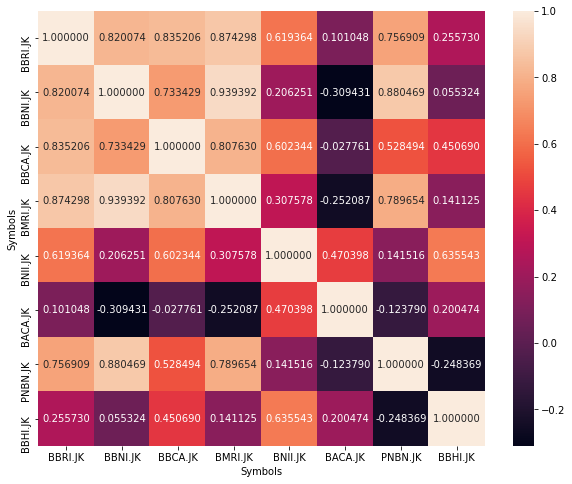

In [225]:
plt.figure(figsize = (10,8))
sns.heatmap(panel_data['Open'].corr(),annot=True,fmt="f")
plt.show()

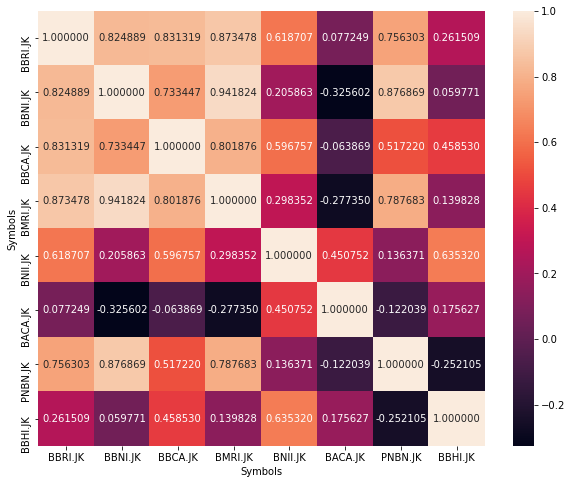

In [226]:
plt.figure(figsize = (10,8))
sns.heatmap(panel_data['Close'].corr(),annot=True,fmt="f")
plt.show()

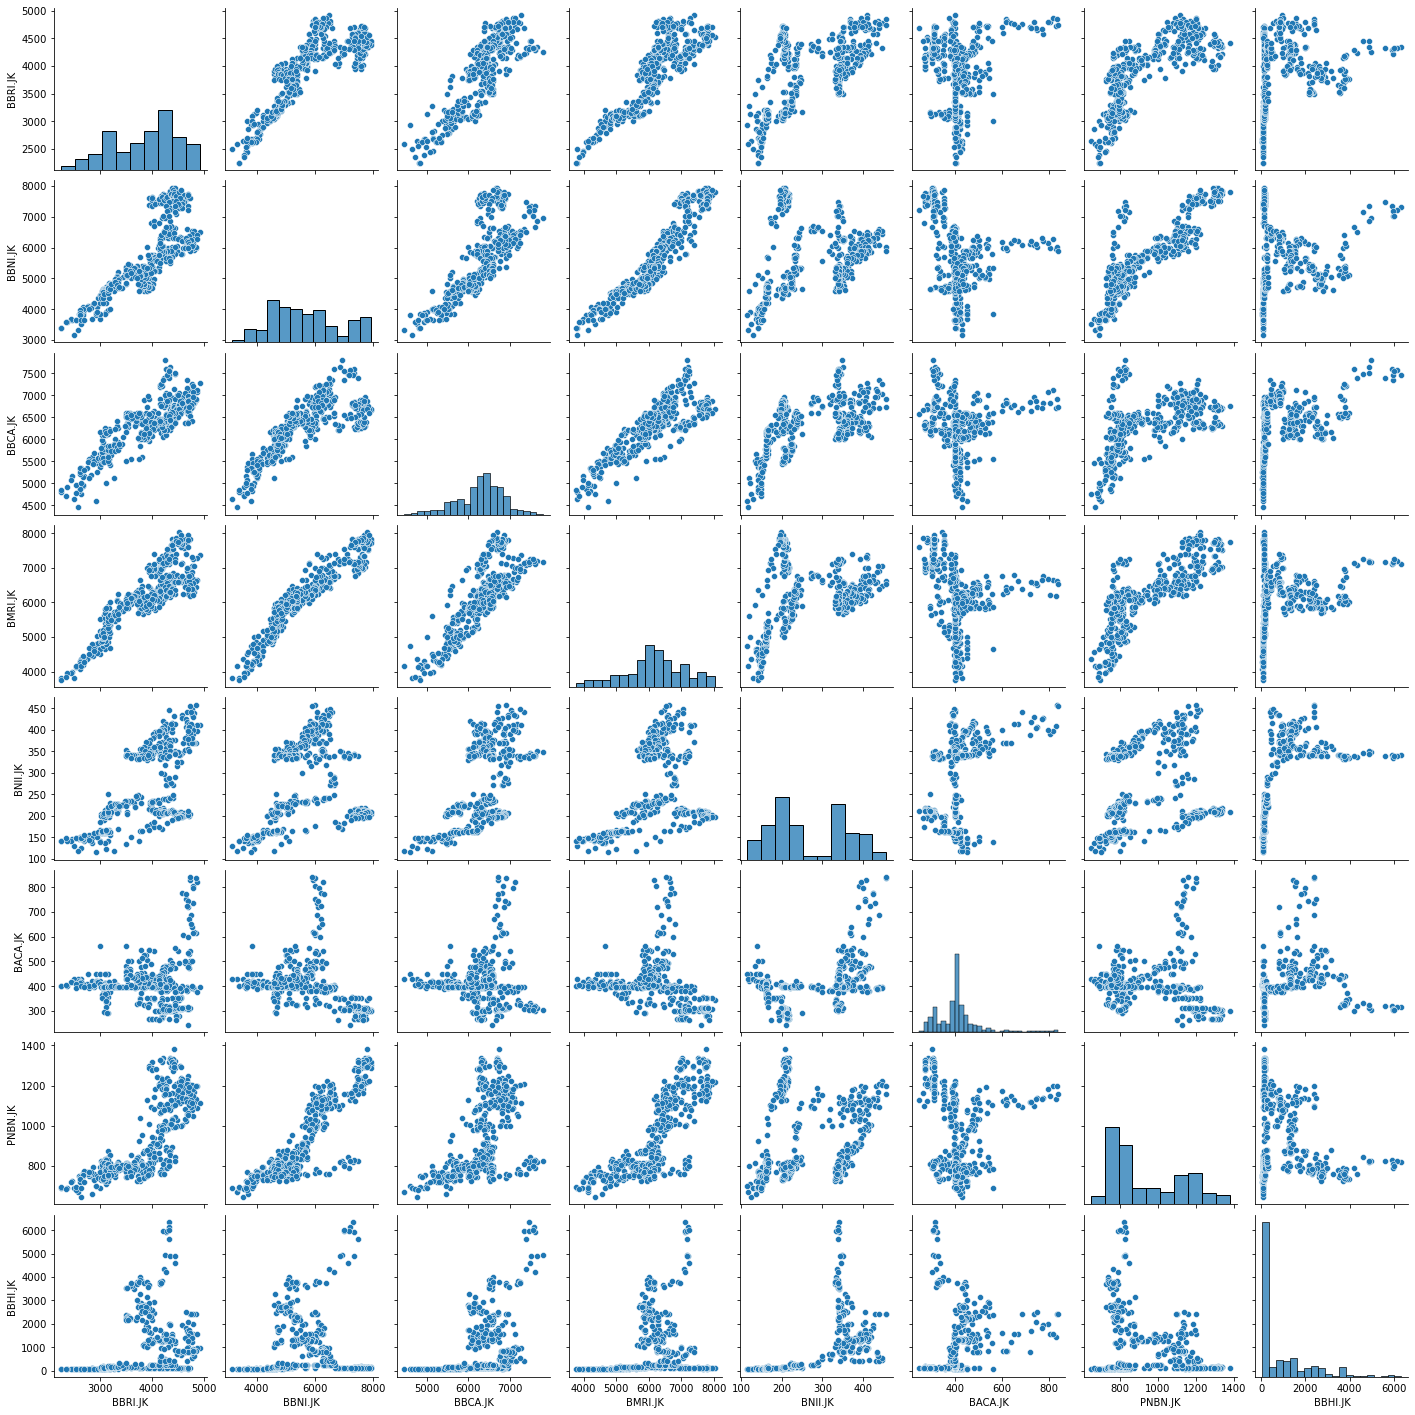

In [227]:
sns.pairplot(data=panel_data['Open'],kind='scatter')
plt.show()

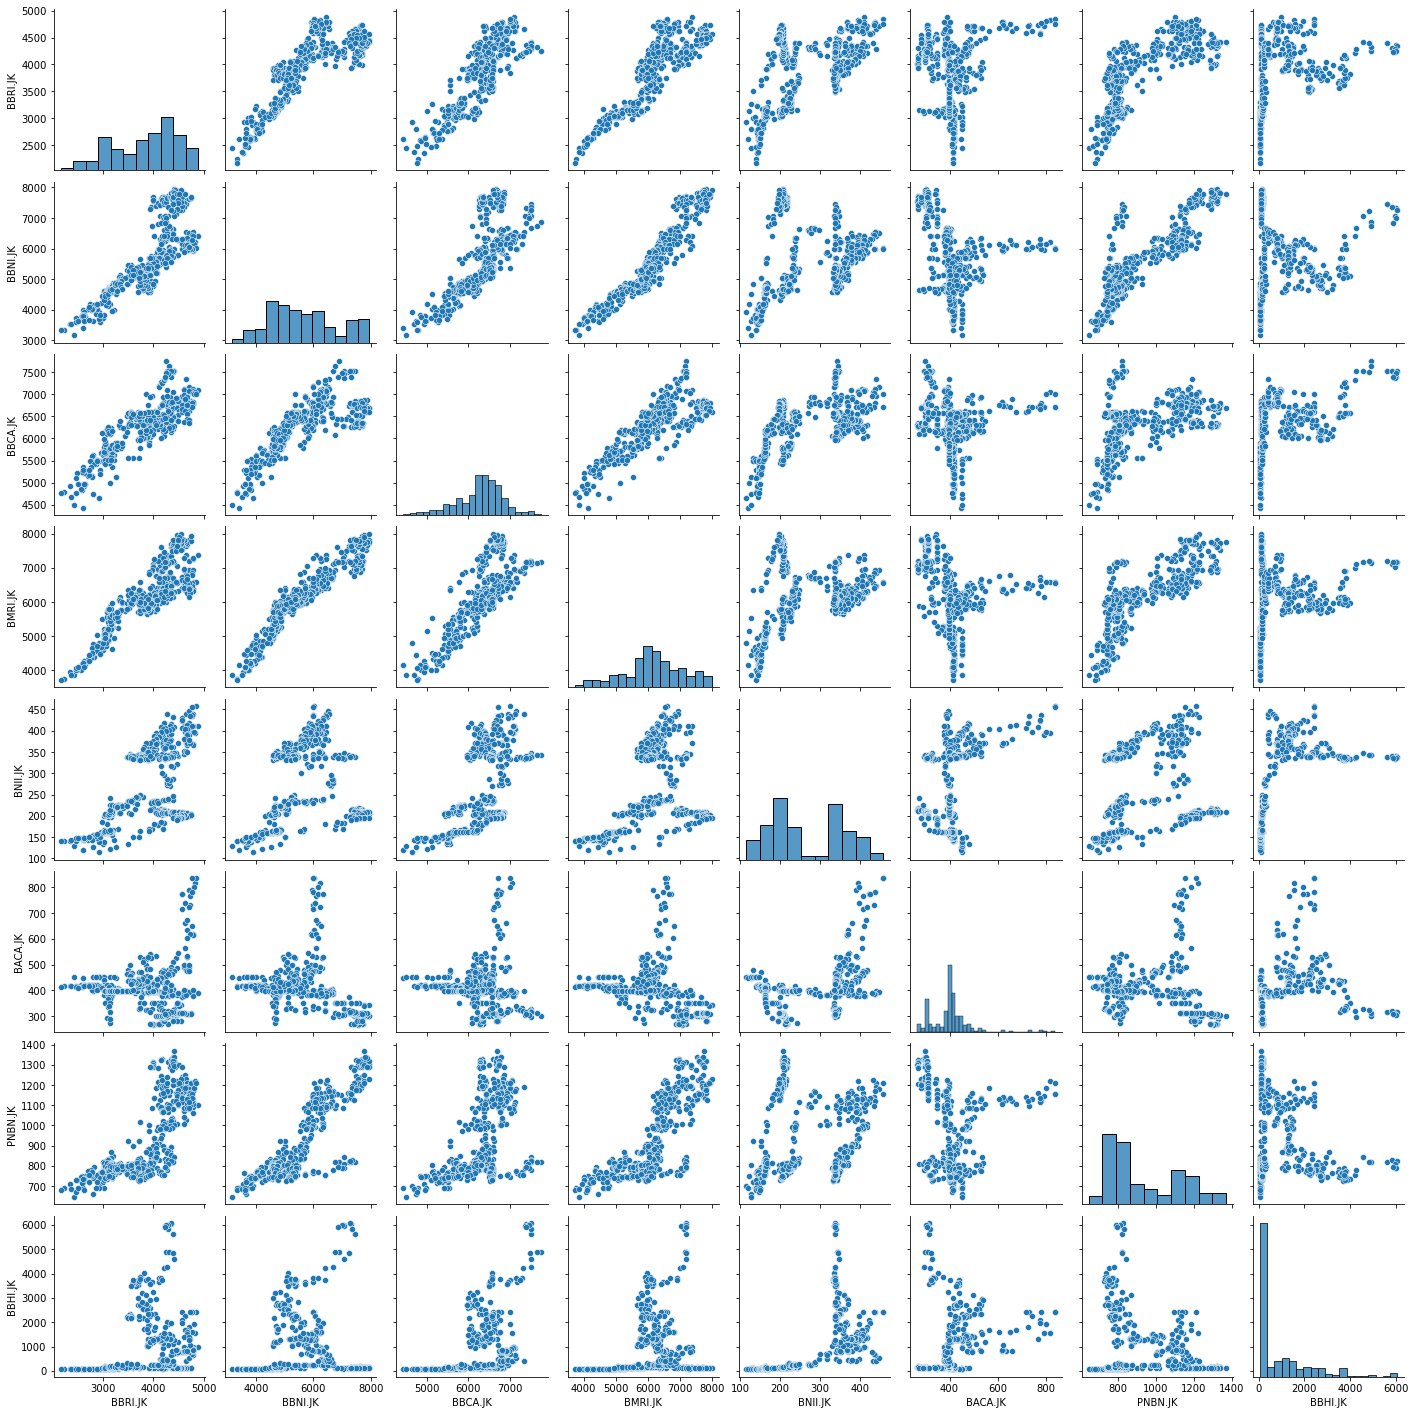

In [228]:
sns.pairplot(data=panel_data['Close'],kind='scatter')
plt.show()

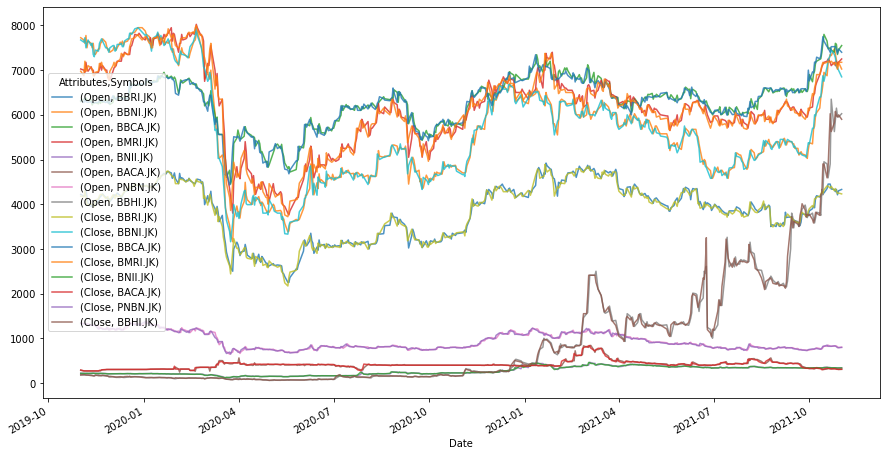

In [229]:
panel_data.plot(y=['Open', 'Close'],alpha=0.8,figsize=(15, 8));

In [230]:
close_value = panel_data['Close']
open_value = panel_data['Open']

print(close_value.iloc[0])

Symbols
BBRI.JK    4180.0
BBNI.JK    7675.0
BBCA.JK    6325.0
BMRI.JK    6975.0
BNII.JK     214.0
BACA.JK     290.0
PNBN.JK    1330.0
BBHI.JK     180.0
Name: 2019-11-01 00:00:00, dtype: float64


In [231]:
close_value.shape

(486, 8)

In [232]:
close_value = np.array(close_value).T
open_value = np.array(open_value).T

close_value.shape

(8, 486)

---
### (Close Value - Open Value) / Open Value
---

In [233]:
row,col = close_value.shape

movements = np.zeros([row,col])

for i in range (0,row):
    movements[i,:] = np.subtract(close_value[i,:],open_value[i,:])
    movements[i,:] = np.true_divide(movements[i,:],open_value[i,:])

print('Perusahaan : {}, Perubahan : {} '.format(companies[1][1],movements[1][1]))

Perusahaan : BBCA.JK, Perubahan : -0.006514657980456026 


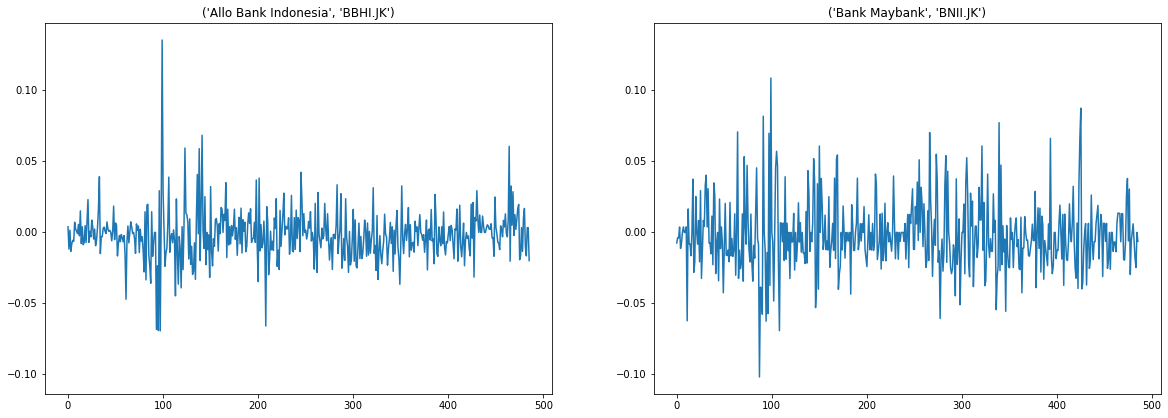

In [234]:
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(221)
plt.plot(movements[2][:])
plt.title(companies[2])

plt.subplot(222, sharey=ax1)
plt.plot(movements[6][:])
plt.title(companies[6])
plt.show()

In [235]:
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.min())
print(new.mean())
print(new.max())

-0.18375772268388038
-0.000868999177497571
0.356973543171794


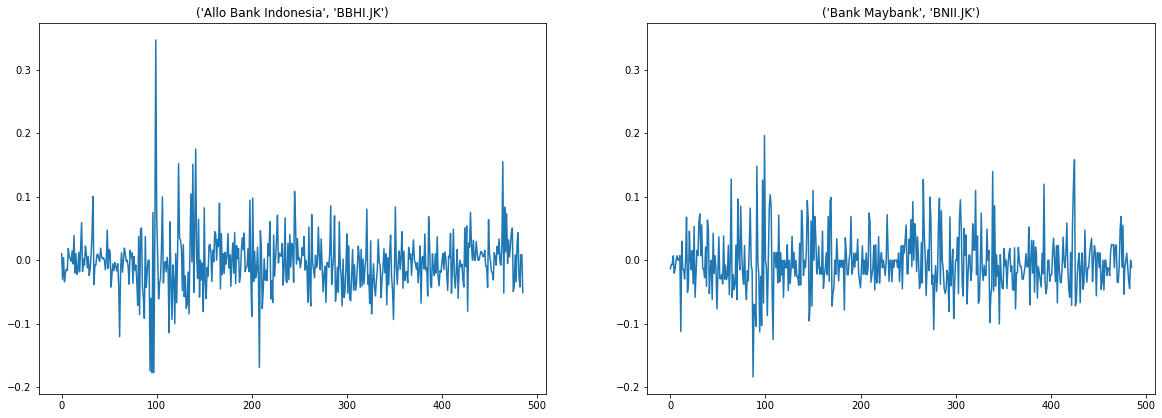

In [236]:
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(221)
plt.plot(new[2][:])
plt.title(companies[2])

plt.subplot(222, sharey=ax1)
plt.plot(new[6][:])
plt.title(companies[6])
plt.show()

In [248]:
normalizer = Normalizer()

kmeans = KMeans(n_clusters=6, max_iter=600)

pipeline = make_pipeline(normalizer,kmeans)

In [249]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=600, n_clusters=6))])

In [250]:
print(kmeans.inertia_)

0.5475673490129918


In [251]:
labels = pipeline.predict(movements)

df = pd.DataFrame({'Clusters':labels, 'Perusahaan':companies})

print(df.sort_values('Clusters'))

   Clusters                         Perusahaan
0         0  (Bank Capital Indonesia, BACA.JK)
1         0                (Bank BCA, BBCA.JK)
3         0                (Bank BNI, BBNI.JK)
5         1            (Bank Mandiri, BMRI.JK)
7         2      (Bank Pan Indonesia, PNBN.JK)
4         3                (Bank BRI, BBRI.JK)
6         4            (Bank Maybank, BNII.JK)
2         5     (Allo Bank Indonesia, BBHI.JK)


In [252]:
reduced_data = PCA(n_components=2).fit_transform(new)

kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

df = pd.DataFrame({'Clusters':labels, 'Perusahaan':companies})

print(df.sort_values('Clusters'))

   Clusters                         Perusahaan
2         0     (Allo Bank Indonesia, BBHI.JK)
5         1            (Bank Mandiri, BMRI.JK)
7         2      (Bank Pan Indonesia, PNBN.JK)
4         3                (Bank BRI, BBRI.JK)
0         4  (Bank Capital Indonesia, BACA.JK)
1         4                (Bank BCA, BBCA.JK)
3         4                (Bank BNI, BBNI.JK)
6         5            (Bank Maybank, BNII.JK)


In [253]:
print(kmeans.inertia_)

0.0010536222507764946


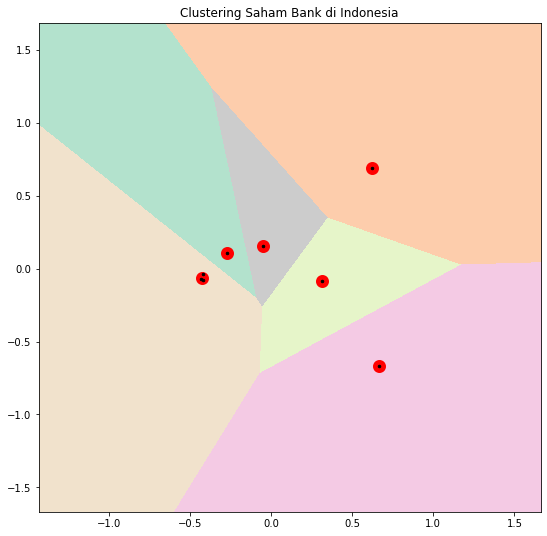

In [254]:
h=0.001

x_min,x_max = reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min,y_max = reduced_data[:,1].min()-1,reduced_data[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.figure(figsize=(9,9))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = plt.cm.Pastel2, aspect='auto', origin='lower')
plt.plot(reduced_data[:,0],reduced_data[:,1], 'k.', markersize=5)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker="o",s=100,linewidth=3,c="r")

plt.title('Clustering Saham Bank di Indonesia')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()